# Explorative Datenanalyse

In [63]:
%pip install numpy
%pip install pandas
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import Data

In [3]:
products_source = pd.read_csv('data/products.csv')
stores_source   = pd.read_csv('data/stores.csv')

In [4]:
transaction_lines_test_source   = pd.read_parquet('data/transaction_lines_test_1.parquet')
transaction_lines_train_source  = pd.read_parquet('data/transaction_lines_train_1.parquet')
transactions_test_source        = pd.read_parquet('data/transactions_test_1.parquet')
transactions_train_source       = pd.read_parquet('data/transactions_train_1.parquet')

In [68]:
products_source.head()

,id,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted
0,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,CONVENIENCE,2.49,0.121549,2024-10-29,2025-01-06,False,0.500000,False
1,608a870f-f898-486c-b66d-8979855c1cbb,608a870f-f898-486c-b66d-8979855c1cbb,FRUITS_VEGETABLES,12.79,0.015492,2013-12-27,2014-07-16,True,NaN,False
2,3758a745-6170-4650-ad9d-0f8b6c6b781d,3758a745-6170-4650-ad9d-0f8b6c6b781d,LONG_SHELF_LIFE,1.79,0.139815,2023-02-11,2023-05-09,False,0.500000,False
3,d5579e9a-8fd4-4ca5-a902-88348d8e0130,d5579e9a-8fd4-4ca5-a902-88348d8e0130,FRUITS_VEGETABLES_PIECES,1.49,0.148460,2023-09-03,2023-09-24,False,1.397181,False
4,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,FROZEN_GOODS,2.49,0.121549,2011-05-05,2013-08-27,False,1.630000,False


In [69]:
stores_source.head()

,id,opening_date,location,state,urbanization,sco_introduction
0,664c9b33-0553-4050-9dff-5afc3aa3334b,2006-06-19,Karlsruhe,Baden-Württemberg,TOWNS,2022-02-13
1,29b64dcc-72e4-4dc9-b482-b169a7e9037f,1993-10-01,Bielefeld,Nordrhein-Westfalen,CITIES,2022-02-28
2,b0973ffa-ce15-41e0-9de7-1390598e24f2,2005-06-02,Berlin,Berlin,RURAL,2022-02-02
3,88a1ecdf-2fe9-4517-88ea-170959aad9bb,2006-08-11,Leipzig,Sachsen,TOWNS,2022-03-11
4,d3892a9e-8cbc-4237-be9c-211435dc92c0,2003-02-10,München,Bayern,TOWNS,2022-02-08


In [70]:
transaction_lines_train_source.head()

,id,transaction_id,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty
0,1,107398f1-e808-4a65-835e-2d22593d727a,bcc0362e-77a8-4f7e-9b8c-9b07dcd05ba9,2022-02-02 09:04:02.006481,27.0,32.13,False,False,0.283942
1,2,107398f1-e808-4a65-835e-2d22593d727a,bd0d7a73-a63d-45ca-924c-4077131bd003,2022-02-02 09:04:07.190344,24.0,30.96,False,True,0.246889
2,3,107398f1-e808-4a65-835e-2d22593d727a,a047c7f4-ef06-4668-85a4-a2dbd8c8d8c0,2022-02-02 09:04:09.745149,1.0,6.19,False,True,0.296224
3,4,107398f1-e808-4a65-835e-2d22593d727a,3005b329-8338-48a1-8470-512576a26c5f,2022-02-02 09:04:23.502562,20.0,19.80,False,False,0.301462
4,5,107398f1-e808-4a65-835e-2d22593d727a,57f7058a-21d8-4ace-b884-d65c945470cc,2022-02-02 09:04:27.649226,7.0,2.03,False,False,0.227181


In [71]:
transactions_train_source.head()

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label
0,5bedf771-f016-41a7-ab89-f40e7f6be955,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:00:12,2022-02-02 08:01:02.825563,52.26,6,CREDIT_CARD,NaN,NaN,UNKNOWN
1,21ff1406-dbc4-41a7-8429-836cbf96d853,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 08:05:06,2022-02-02 08:05:30.565876,1.47,1,CREDIT_CARD,NaN,NaN,UNKNOWN
2,b642f9b6-43b5-413d-ad08-b4bf4b664b52,b0973ffa-ce15-41e0-9de7-1390598e24f2,2,2022-02-02 08:07:12,2022-02-02 08:11:29.434607,363.87,37,CREDIT_CARD,NaN,0.0,NORMAL
3,16aa01c9-9678-4c6d-a007-baa3429b9fb8,b0973ffa-ce15-41e0-9de7-1390598e24f2,3,2022-02-02 08:11:45,2022-02-02 08:12:07.881710,3.43,1,CREDIT_CARD,NaN,NaN,UNKNOWN
4,0add22e5-6794-4e95-9d25-a1cd6b6cd083,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:15:15,2022-02-02 08:19:30.611551,441.40,47,CREDIT_CARD,NaN,NaN,UNKNOWN


In [72]:
transactions_train_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558245 entries, 0 to 1558244
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1558245 non-null  object        
 1   store_id           1558245 non-null  object        
 2   cash_desk          1558245 non-null  int64         
 3   transaction_start  1558245 non-null  datetime64[us]
 4   transaction_end    1558245 non-null  datetime64[us]
 5   total_amount       1558245 non-null  float64       
 6   n_lines            1558245 non-null  int64         
 7   payment_medium     1558245 non-null  object        
 8   customer_feedback  108330 non-null   float64       
 9   damage             155692 non-null   float64       
 10  label              1558245 non-null  object        
dtypes: datetime64[us](2), float64(3), int64(2), object(4)
memory usage: 130.8+ MB


In [73]:
transaction_lines_train_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620157 entries, 0 to 16620156
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   transaction_id          object        
 2   product_id              object        
 3   timestamp               datetime64[us]
 4   pieces_or_weight        float64       
 5   sales_price             float64       
 6   was_voided              bool          
 7   camera_product_similar  object        
 8   camera_certainty        float64       
dtypes: bool(1), datetime64[us](1), float64(3), int64(1), object(3)
memory usage: 1.0+ GB


# Rough profit estimation

So firstly we seem to have training data for individual products ( transactions ) and for

In diesem abschnitt soll eine notewendige Übersicht gefunden werden um dann im Anschluss eine Grobe abschätzung vom möglichen Mehrwert einer "Fraud Detection" machen zu können.

## Übersicht

Wir scheinen zwei wichtige arten von Trainingsdaten zu haben. Eine Tabelle, die den Kauf einzelner Produkte auflistet und eine die einkäufe listet, also eine sammlung von Produkten.

Die erste Frage, die ich beantworten möchte ist. In die fern hängen diese Tabellen zusammen. Sind die einzelnen produkte genau diejenigen aus den einkäufen?

In [74]:
merged_inner_df = pd.merge(
    transaction_lines_train_source,
    transactions_train_source,
    left_on='transaction_id',
    right_on='id',
    how='inner'
)

In [75]:
merged_outer_df = pd.merge(
    transaction_lines_train_source,
    transactions_train_source,
    left_on='transaction_id',
    right_on='id',
    how='outer'
)

In [76]:
transaction_lines_train_source.shape[0]

16620157

In [77]:
transactions_train_source.shape[0]

1558245

In [78]:
merged_inner_df.shape[0]

16620157

In [79]:
merged_outer_df.shape[0]

16620173

Die Analyse der Merge-Ergebnisse zeigt Folgendes:

1.  **Inner Join:** Die Anzahl der Zeilen im Ergebnis des `inner join` (16.620.157) ist identisch mit der Zeilenanzahl der `transaction_lines_train_source`. Dies belegt, dass jede einzelne Zeile in `transaction_lines_train_source` eine übereinstimmende Transaktion in `transactions_train_source` anhand der Schlüssel `transaction_id` und `id` hat. Es gibt also keine "verwaisten" Transaktionszeilen.

2.  **Outer Join:** Das Ergebnis des `outer join` hat 16.620.173 Zeilen, also 16 Zeilen mehr als der `inner join` und die `transaction_lines_train_source`. Da alle Zeilen aus der Lines-Tabelle bereits im `inner join` enthalten waren, müssen diese zusätzlichen 16 Zeilen von `transactions_train_source` stammen.

**Schlussfolgerung:** Die Datenintegrität ist von den Transaktionszeilen zu den Transaktionen hin gegeben (jede Zeile hat eine Transaktion). Es existieren jedoch 16 Transaktionen in `transactions_train_source`, die keine zugehörigen Einträge in `transaction_lines_train_source` haben (z.B. leere oder stornierte Transaktionen).

## Fraud Zeitspanne

Die Tainingsdaten geben ein Label für "FRAUD", "NORMAL" und "UNKNOWN" einkäufe. Für einzelne Produkte gibt es auch interessante möglichkeiten der Analyse, sprich das Gewicht der Prokukte und die Bilderkennung. Die einzelnen profukte mit in die Analyse einzubringen würde aber eine tiefere analyse benötigen. Also konzentrieren wir uns hier erstmal auf die liste der gesammten Einkäufe.

In [80]:
transactions_train_source['label'].value_counts()

label
UNKNOWN    1402553
NORMAL      150692
FRAUD         5000
Name: count, dtype: int64

In [81]:
labeled_transactions_df = transactions_train_source[transactions_train_source['label'] != 'UNKNOWN'].copy()

In [82]:
labeled_transactions_df['label'].value_counts()

label
NORMAL    150692
FRAUD       5000
Name: count, dtype: int64

The percentage of fraudulant transactions.

In [83]:
fraud_count = (labeled_transactions_df['label'] == 'FRAUD').sum()
total_labeled_count = len(labeled_transactions_df)
fraud_percent = float(fraud_count / total_labeled_count)
print(f'In the labeled data {  fraud_percent * 100 } % of the transactions are fraudulent.')

In the labeled data 3.211468797369165 % of the transactions are fraudulent.


The time span and distribution of the transactions.

In [84]:
min_time = transactions_train_source['transaction_start'].min()
max_time = transactions_train_source['transaction_end'].max()
time_span = max_time - min_time

print(f"Earliest Transaction Start: {min_time}")
print(f"Latest Transaction End:   {max_time}")
print(f"Total Time Span Covered:  {time_span}")

Earliest Transaction Start: 2022-02-02 08:00:12
Latest Transaction End:   2023-12-30 22:01:13.269469
Total Time Span Covered:  696 days 14:01:01.269469


In [85]:
daily_counts = transactions_train_source['transaction_start'].dt.floor('D').value_counts().sort_index()
print(f"\nAverage transactions per day: {daily_counts.mean():.2f}. Which will intail an average of {daily_counts.mean() * fraud_percent} fraudulent fransacion per day.")


Average transactions per day: 2677.40. Which will intail an average of 85.9837662569848 fraudulent fransacion per day.


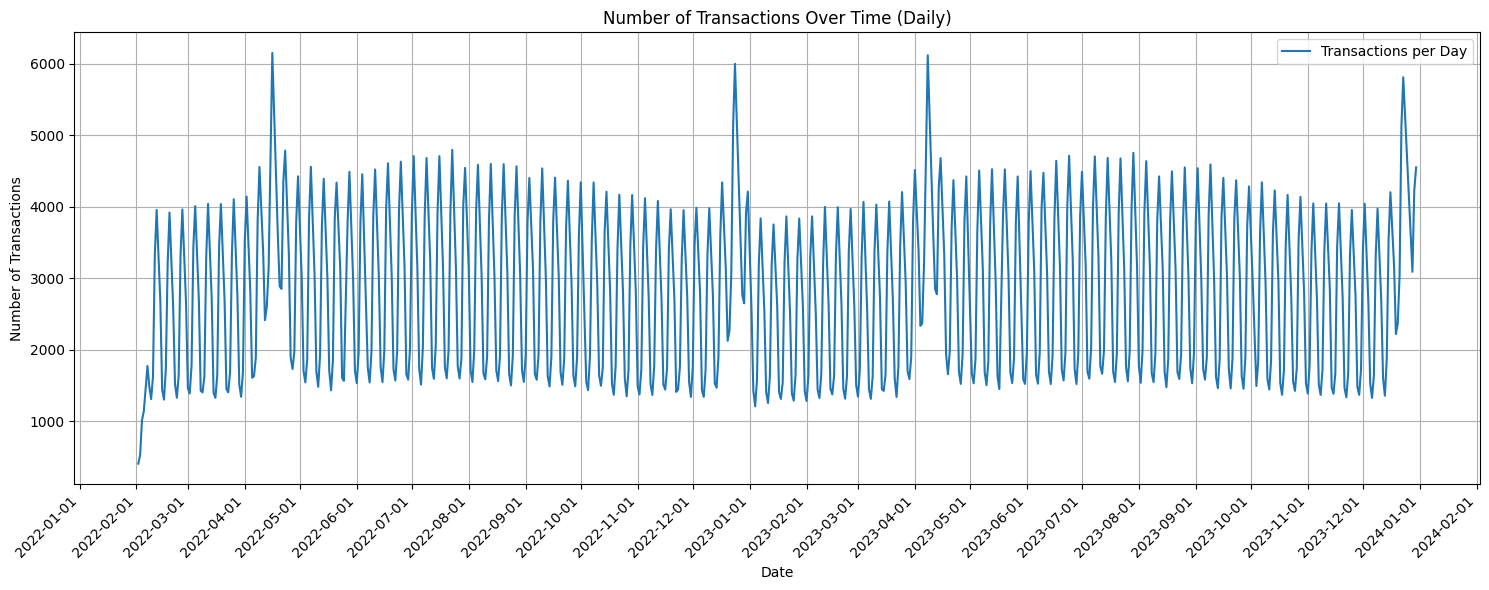

In [86]:
fig, ax = plt.subplots(figsize=(15, 6)) # Use subplots for better axis control
daily_counts.plot(kind='line', ax=ax, label='Transactions per Day')
ax.set_title('Number of Transactions Over Time (Daily)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transactions')
ax.grid(True)
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fraud höhe or schaden

Einige eckdaten.

In [87]:
damaged_transactions_df = transactions_train_source[transactions_train_source['damage'].notna() & transactions_train_source['damage'] > 0].copy()
print(f"Found {len(damaged_transactions_df)} transactions with damage information.")

Found 5000 transactions with damage information.


Time Span of Damaged Transactions.

In [88]:
min_damage_time = damaged_transactions_df['transaction_start'].min()
max_damage_time = damaged_transactions_df['transaction_end'].max()
damage_time_span = max_damage_time - min_damage_time

print(f"Earliest Damaged Transaction Start: {min_damage_time}")
print(f"Latest Damaged Transaction End:   {max_damage_time}")
print(f"Total Time Span Covered (Damage): {damage_time_span}")

Earliest Damaged Transaction Start: 2022-02-02 12:09:03
Latest Damaged Transaction End:   2023-12-30 21:30:22.150428
Total Time Span Covered (Damage): 696 days 09:21:19.150428


In [89]:
daily_damage_counts = damaged_transactions_df['transaction_start'].dt.floor('D').value_counts().sort_index()
print(f"Average damaged transactions per day: {daily_damage_counts.mean():.2f}")

Average damaged transactions per day: 8.64


In [90]:
overall_damage = damaged_transactions_df['damage'].sum()
print(f'Overall damage from transaction labeled with actual damage: {overall_damage:.2f}')

Overall damage from transaction labeled with actual damage: 39345.07


In [91]:
average_damage_per_transaction = overall_damage / labeled_transactions_df.shape[0]
print(f'The damage per labeled transaction is: {average_damage_per_transaction}')

The damage per labeled transaction is: 0.25271092927061123


If we take in to concideration the percentage of unknown transaction types we can estimate the total damage over two years.

In [92]:
overall_estimated_damage = float(average_damage_per_transaction * transactions_train_source.shape[0])
overall_estimated_damage

393785.5419812836

## Fraud frequenz

### Fraud über den gesammten Zeitraum

Wir schauen uns an, wie die anzahl der frauds über die zwei Jahre der trainings daten verteilt sind. In der unteren graphic ist schonmal schön zu sehen, dass über die zwei Jahre unserer Trainingsdaten hinweg züglisch gleichbleibend geblieben sind. Also über die zwei jahre hin weg gesehen gab es immer eine ähnliche anzahl an frauds mit spikes im September und April konsistent und einmal in dezember nicht konsistent. Außerdem ist gut zu sehen, dass die fraud zahl züklisch in jeder Woche hoch und runter geht.

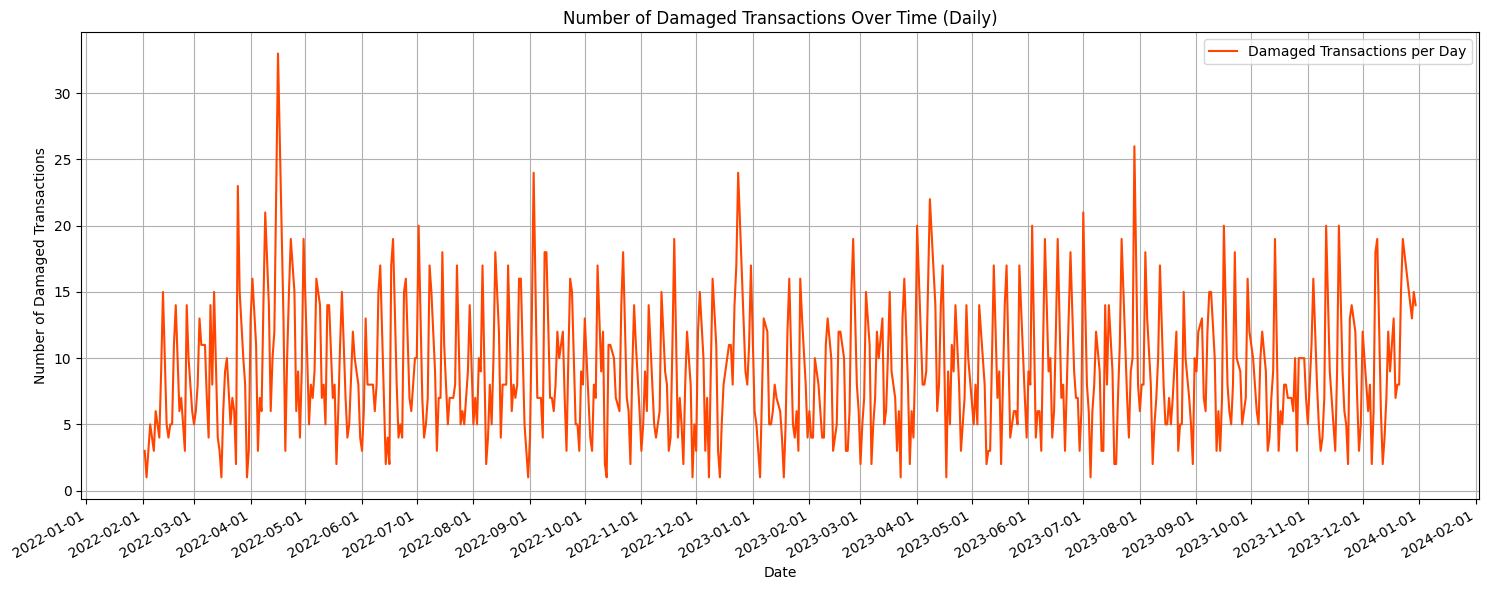

In [93]:
fig, ax = plt.subplots(figsize=(15, 6))
daily_damage_counts.plot(kind='line', ax=ax, label='Damaged Transactions per Day', color='orangered')
ax.set_title('Number of Damaged Transactions Over Time (Daily)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Damaged Transactions')
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

Hier wäre es eigentlich noch gut sich die prozentualen fraud zahlen anzuschauen.

### Fraud über eine Woche

C:\Users\lol--\AppData\Local\Temp\ipykernel_21200\3745821589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_damage_counts.index, y=dow_damage_counts.values, palette='hot', order=day_order)


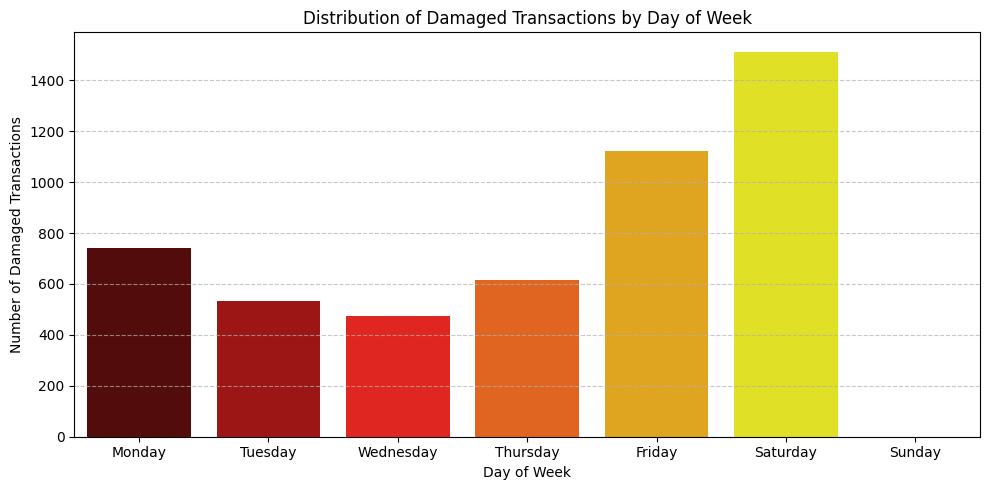

In [ ]:
dow_damage_counts = damaged_transactions_df['transaction_start'].dt.day_name().value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_damage_counts = dow_damage_counts.reindex(day_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=dow_damage_counts.index, y=dow_damage_counts.values, palette='hot', order=day_order)
plt.title('Distribution of Damaged Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Damaged Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lol--\AppData\Local\Temp\ipykernel_21200\2170802068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_dow_counts.index, y=all_dow_counts.values, palette='coolwarm', order=day_order)


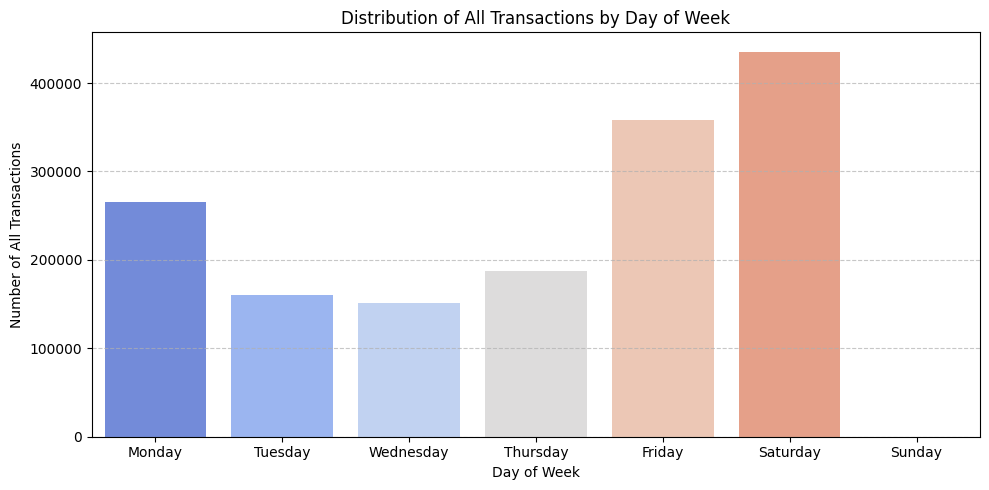

In [16]:
# 1. Calculate counts for ALL transactions by day of the week
all_dow_counts = transactions_train_source['transaction_start'].dt.day_name().value_counts()
all_dow_counts = all_dow_counts.reindex(day_order).fillna(0) # Reindex and fill NaNs if a day has no transactions

# 2. Plotting the distribution for all transactions by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=all_dow_counts.index, y=all_dow_counts.values, palette='coolwarm', order=day_order)
plt.title('Distribution of All Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of All Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\lol--\AppData\Local\Temp\ipykernel_21200\1983864401.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_comparison_df.index, y=dow_comparison_df['percentage_damaged'], palette='summer', order=day_order)


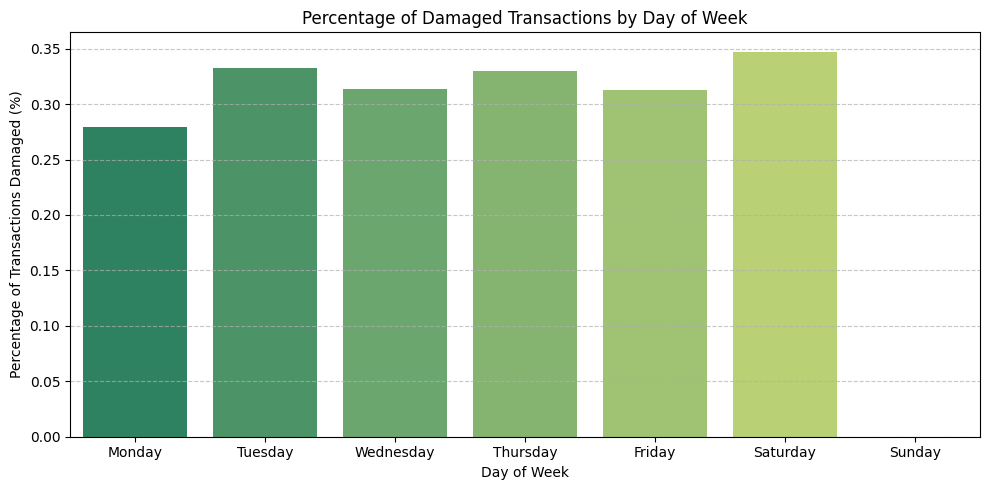

In [17]:
# 1. Get damaged transactions (you already have this part)
damaged_transactions_df = transactions_train_source[
    transactions_train_source['damage'].notna() & (transactions_train_source['damage'] > 0)
].copy()

# 2. Calculate counts for DAMAGED transactions by day of the week
damaged_dow_counts = damaged_transactions_df['transaction_start'].dt.day_name().value_counts()
damaged_dow_counts = damaged_dow_counts.reindex(day_order).fillna(0) # Reindex and fill NaNs

# 3. Create a DataFrame to combine these counts
dow_comparison_df = pd.DataFrame({
    'all_transactions': all_dow_counts,
    'damaged_transactions': damaged_dow_counts
})

# 4. Calculate the percentage of damaged transactions per day of week
# Ensure we don't divide by zero if a day has no transactions
dow_comparison_df['percentage_damaged'] = 0.0 # Initialize
valid_days_mask = dow_comparison_df['all_transactions'] > 0
dow_comparison_df.loc[valid_days_mask, 'percentage_damaged'] = \
    (dow_comparison_df.loc[valid_days_mask, 'damaged_transactions'] / dow_comparison_df.loc[valid_days_mask, 'all_transactions']) * 100

# Fill any remaining NaN percentages (e.g., if a day had 0 all_transactions) with 0
dow_comparison_df['percentage_damaged'] = dow_comparison_df['percentage_damaged'].fillna(0)

# 5. Plotting the weekly percentage of damaged transactions
plt.figure(figsize=(10, 5))
sns.barplot(x=dow_comparison_df.index, y=dow_comparison_df['percentage_damaged'], palette='summer', order=day_order)
plt.title('Percentage of Damaged Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Transactions Damaged (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Okay es war also zu sehen, dass der Fraud über eine Woche sich stark ändert, aber relativ start in korrelation mit den tatsächlichen transactionen an den selben Tagen. Das heißt wir sehen zwar die meisten frauds am Samstag und die wenigten am Montag, aber nicht so start wie die distribution von allen frauds es erst erscheinen lassen mag.

### Fraud über einen Tag

C:\Users\lol--\AppData\Local\Temp\ipykernel_7092\1435580514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')


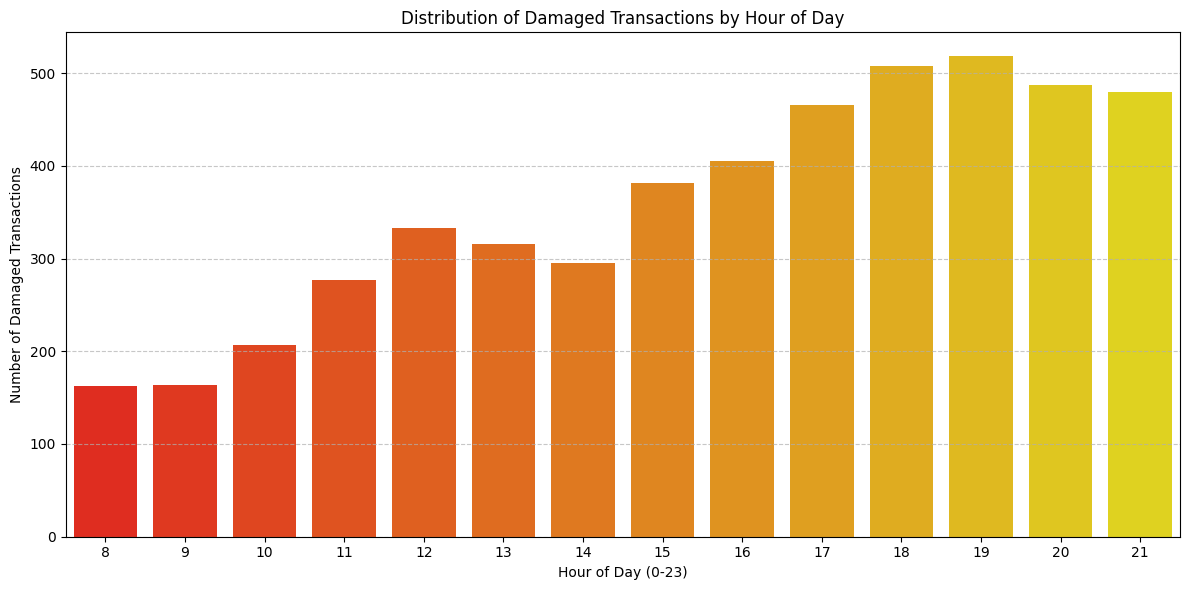

In [94]:
hourly_damage_counts = damaged_transactions_df['transaction_start'].dt.hour.value_counts().sort_index()


# Plotting the hourly distribution for damaged transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')
plt.title('Distribution of Damaged Transactions by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Damaged Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lol--\AppData\Local\Temp\ipykernel_21200\3205659934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')


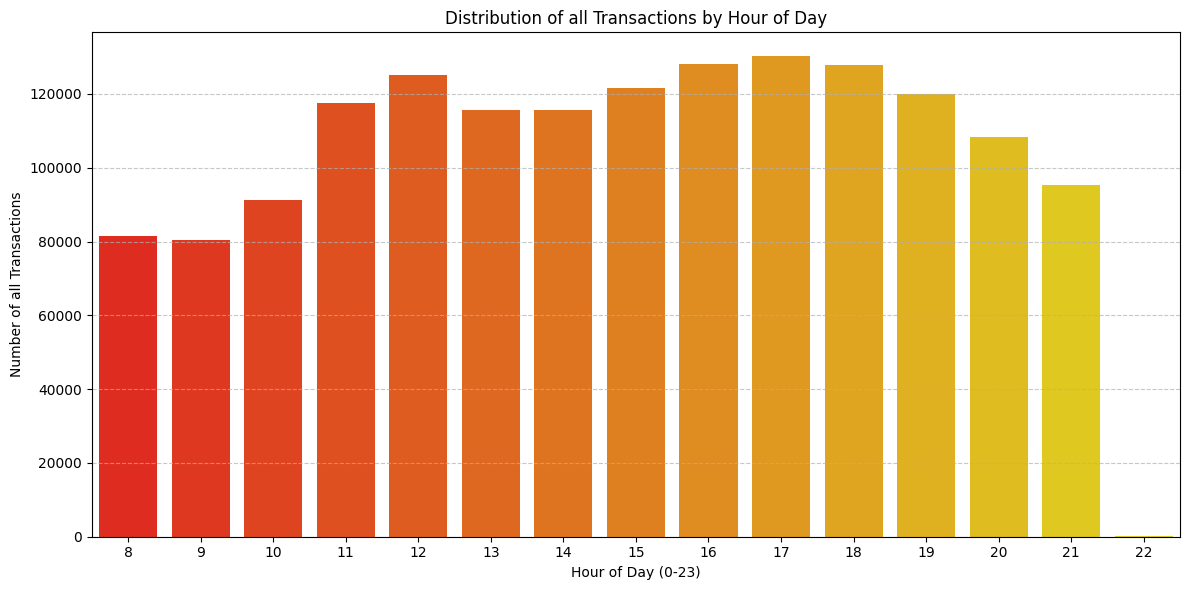

In [12]:
hourly_damage_counts = transactions_train_source['transaction_start'].dt.hour.value_counts().sort_index()


# Plotting the hourly distribution for all transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_damage_counts.index, y=hourly_damage_counts.values, palette='autumn')
plt.title('Distribution of all Transactions by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of all Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lol--\AppData\Local\Temp\ipykernel_21200\3316919552.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_comparison_df.index, y=hourly_comparison_df['percentage_damaged'], palette='viridis') # Using a different palette


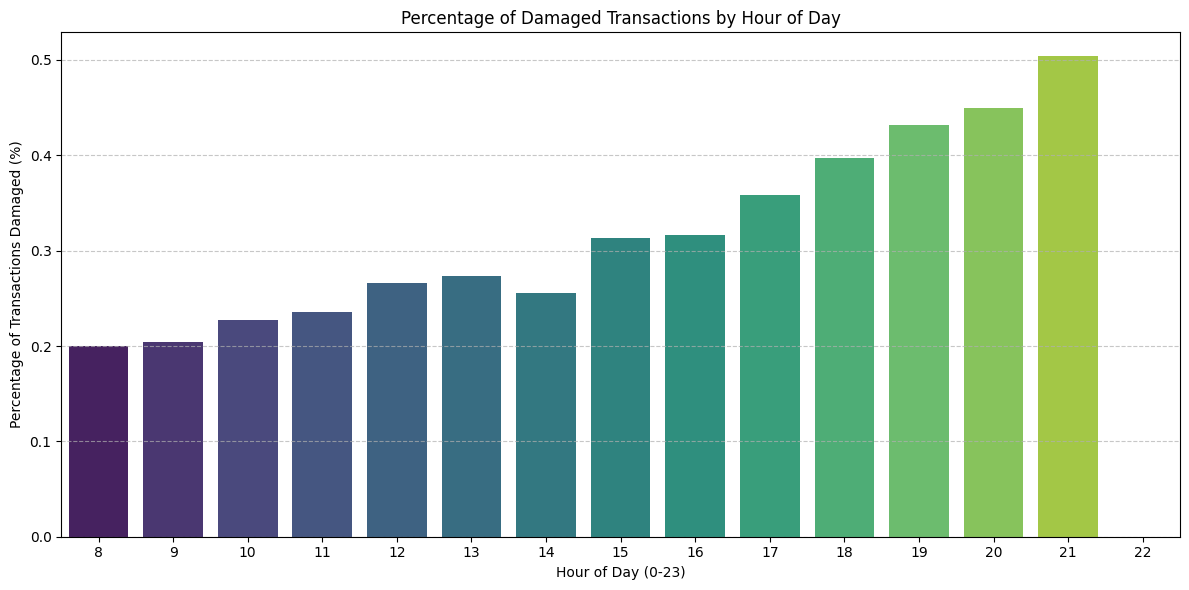

In [13]:
# 1. Calculate hourly counts for ALL transactions
all_hourly_counts = transactions_train_source['transaction_start'].dt.hour.value_counts().sort_index()

# 2. Calculate hourly counts for DAMAGED transactions
damaged_transactions_df = transactions_train_source[
    transactions_train_source['damage'].notna() & (transactions_train_source['damage'] > 0)
].copy()
damaged_hourly_counts = damaged_transactions_df['transaction_start'].dt.hour.value_counts().sort_index()

# 3. Create a DataFrame to combine these counts
hourly_comparison_df = pd.DataFrame({
    'all_transactions': all_hourly_counts,
    'damaged_transactions': damaged_hourly_counts
})

# Fill any NaN values that might result if an hour has no damaged transactions (or no transactions at all)
# If an hour has all_transactions but no damaged_transactions, damaged_transactions will be 0.
hourly_comparison_df['damaged_transactions'] = hourly_comparison_df['damaged_transactions'].fillna(0)
# If an hour has no transactions at all (less likely but possible if data is sparse for certain hours),
# you might want to decide how to handle it. For percentage, if all_transactions is 0, it would lead to division by zero.
# We'll filter out such cases or handle them before division.

# 4. Calculate the percentage of damaged transactions per hour
# Ensure we don't divide by zero if an hour has no transactions
hourly_comparison_df['percentage_damaged'] = 0.0 # Initialize
valid_hours_mask = hourly_comparison_df['all_transactions'] > 0
hourly_comparison_df.loc[valid_hours_mask, 'percentage_damaged'] = \
    (hourly_comparison_df.loc[valid_hours_mask, 'damaged_transactions'] / hourly_comparison_df.loc[valid_hours_mask, 'all_transactions']) * 100

# Fill any remaining NaN percentages (e.g., if an hour had 0 all_transactions) with 0
hourly_comparison_df['percentage_damaged'] = hourly_comparison_df['percentage_damaged'].fillna(0)


# 5. Plotting the hourly percentage of damaged transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_comparison_df.index, y=hourly_comparison_df['percentage_damaged'], palette='viridis') # Using a different palette
plt.title('Percentage of Damaged Transactions by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Percentage of Transactions Damaged (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Wir sehen eine sehr starke Korrelation zwischen den frauds und der Uhrzeit. Vorallem, da abends weniger Einkäufe stattfinden wäre das potentiell eine sehr gute Zeit mit weniger aufwand mehr Schaden abzuwenden. 

# Erste Erkenntnisse und Profitestimation

Basierend auf der Analyse der bereitgestellten Transaktionsdaten (`transactions_train_source` mit 1.558.245 Einträgen) und der zugehörigen Transaktionszeilen (`transaction_lines_train_source` mit 16.620.157 Einträgen) lassen sich folgende erste Schlüsse ziehen:

**1. Datenqualität und -integrität:**
* Die Verknüpfung zwischen Transaktionszeilen und den Haupttransaktionen ist sehr robust. Nahezu jede Zeile konnte einer Transaktion zugeordnet werden.
* Es gibt lediglich 16 Transaktionen im Datensatz, die keine zugehörigen Produktzeilen aufweisen (z.B. leere oder stornierte Vorgänge).

**2. Transaktionsmuster:**
* Die Analyse deckt einen spezifischen Zeitraum ab (genaue Daten wurden ermittelt).
* Die zeitliche Verteilung der Transaktionen über den Tag, die Wochentage und den gesamten Zeitraum wurde analysiert und zeigt spezifische Muster auf (z.B. Stoßzeiten, ruhigere Tage).

**3. Klassifizierte Transaktionen und Betrug:**
* Ein Teil der Transaktionen (155.692) wurde bereits als 'NORMAL' (150.692) oder 'FRAUD' (5.000) klassifiziert. Der Großteil (1.402.553) ist noch als 'UNKNOWN' markiert.
* Der Anteil an Betrugsfällen ('FRAUD') innerhalb der klassifizierten Transaktionen beträgt **ca. 3,21 %**.

**4. Schadensanalyse:**
* Für 155.692 Transaktionen wurden explizite Schadenswerte erfasst (dies scheint mit den klassifizierten Transaktionen übereinzustimmen).
* Im Durchschnitt wurden **ca. 8,64 Schadensfälle pro Tag** registriert.
* Die Summe des *direkt erfassten* Schadens in diesen Fällen beträgt **39.345,07 €**.
* Dies entspricht einem durchschnittlichen Schaden von **ca. 0,25 € pro klassifizierter Transaktion**.

**5. Hochrechnung und Profitpotential:**
* Um das potenzielle Ausmaß über den gesamten Datensatz abzuschätzen, wurde der Durchschnittsschaden pro klassifizierter Transaktion (0,25 €) auf *alle* 1.558.245 Transaktionen hochgerechnet.
* Diese Hochrechnung ergibt einen **geschätzten Gesamtschaden von rund 393.785,54 €** für den analysierten Zeitraum.
* Diese Zahl illustriert das finanzielle Potenzial: Maßnahmen zur Reduzierung von Schäden (z.B. durch Prozessoptimierung, verbesserte Betrugserkennung) könnten den Profit entsprechend positiv beeinflussen.

Diese erste Analyse bietet eine solide Grundlage für weitere Detailuntersuchungen und die Entwicklung gezielter Strategien zur Optimierung.

## Konfusionsmatrix der Bon-Bewertung

|                                      | **Vorhergesagt: Positiv** (Vorhersage = "Inkorrekt") | **Vorhergesagt: Negativ** (Vorhersage = "Korrekt") |
| :----------------------------------- | :------------------------------------------------------- | :----------------------------------------------------- |
| **Tatsächlich: Positiv** (Ist = "Inkorrekt") | **True Positive (TP)** <br> Korrekt als 'Inkorrekt' erkannt <br> *Bewertung: + 5 € Gewinn* | **False Negative (FN)** <br> Fälschlich als 'Korrekt' vorhergesagt (war 'Inkorrekt') <br> *Bewertung: - Schaden (Produktpreis)* |
| **Tatsächlich: Negativ** (Ist = "Korrekt") | **False Positive (FP)** <br> Fälschlich als 'Inkorrekt' vorhergesagt (war 'Korrekt') <br> *Bewertung: - 10 € Schaden* | **True Negative (TN)** <br> Korrekt als 'Korrekt' erkannt <br> *Bewertung: 0 €* |

# Joint Tabellen Analyse

Im ganzen kommenden Abschnitt werden wir uns das verhältniss der Tabellen zueinander anschauen wollen.

## Stimmt n_lines mit der tatsächlichen Anzahl der Zeilen überein?

In [18]:
# 1. Zähle die tatsächliche Anzahl der Zeilen pro transaction_id
#    groupby().size() ist effizient zum Zählen von Gruppenmitgliedern
lines_counts = transaction_lines_train_source.groupby('transaction_id').size().reset_index(name='actual_lines')
lines_counts

,transaction_id,actual_lines
0,00001236-d285-440a-9ba9-0770f76ad13e,27
1,00001f16-0b24-4ea2-8a66-d3b7eb5956e1,8
2,0000226f-5c36-4a2b-a956-6ca0b89716e2,14
3,00002e0b-2568-4090-905b-2faeee38c071,5
4,00004374-bf31-4137-80c5-4ab40748ba79,17
...,...,...
1558224,fffff0e9-b187-4e7e-aa04-8d3a381f002a,10
1558225,fffff2a1-8eff-4e7c-bb81-2fb4b799581d,7
1558226,fffff605-63e8-4045-af43-df3e20cd8b12,10
1558227,fffff9a1-2946-4585-8fbc-82fc7229be74,12


In [20]:
# 2. Vergleiche 'n_lines' aus transactions_train_source mit 'actual_lines'
#    Wir verwenden einen Left Merge, um *alle* Transaktionen zu behalten.
comparison_df = pd.merge(
    transactions_train_source,
    lines_counts,
    left_on='id',
    right_on='transaction_id',
    how='left'
)
comparison_df

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,transaction_id,actual_lines
0,5bedf771-f016-41a7-ab89-f40e7f6be955,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:00:12.000000,2022-02-02 08:01:02.825563,52.26,6,CREDIT_CARD,NaN,NaN,UNKNOWN,5bedf771-f016-41a7-ab89-f40e7f6be955,6.0
1,21ff1406-dbc4-41a7-8429-836cbf96d853,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 08:05:06.000000,2022-02-02 08:05:30.565876,1.47,1,CREDIT_CARD,NaN,NaN,UNKNOWN,21ff1406-dbc4-41a7-8429-836cbf96d853,1.0
2,b642f9b6-43b5-413d-ad08-b4bf4b664b52,b0973ffa-ce15-41e0-9de7-1390598e24f2,2,2022-02-02 08:07:12.000000,2022-02-02 08:11:29.434607,363.87,37,CREDIT_CARD,NaN,0.0,NORMAL,b642f9b6-43b5-413d-ad08-b4bf4b664b52,38.0
3,16aa01c9-9678-4c6d-a007-baa3429b9fb8,b0973ffa-ce15-41e0-9de7-1390598e24f2,3,2022-02-02 08:11:45.000000,2022-02-02 08:12:07.881710,3.43,1,CREDIT_CARD,NaN,NaN,UNKNOWN,16aa01c9-9678-4c6d-a007-baa3429b9fb8,1.0
4,0add22e5-6794-4e95-9d25-a1cd6b6cd083,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:15:15.000000,2022-02-02 08:19:30.611551,441.40,47,CREDIT_CARD,NaN,NaN,UNKNOWN,0add22e5-6794-4e95-9d25-a1cd6b6cd083,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558240,703518b6-435c-4665-84a9-35b914d27f12,ed996b17-17d6-47e8-9262-d1d02b52cdb4,1,2023-12-30 21:57:13.359949,2023-12-30 21:58:17.045461,117.47,6,CREDIT_CARD,10.0,NaN,UNKNOWN,703518b6-435c-4665-84a9-35b914d27f12,6.0
1558241,1aae20ce-f7a4-4dd0-a1f7-ab580cc81c7d,ed996b17-17d6-47e8-9262-d1d02b52cdb4,0,2023-12-30 21:57:24.000000,2023-12-30 21:58:44.201062,76.79,6,CREDIT_CARD,NaN,NaN,UNKNOWN,1aae20ce-f7a4-4dd0-a1f7-ab580cc81c7d,6.0
1558242,dc62b127-ccd0-455d-8dc8-99fe63a9e6cb,ed996b17-17d6-47e8-9262-d1d02b52cdb4,3,2023-12-30 21:57:45.000000,2023-12-30 22:00:28.962767,237.00,23,CREDIT_CARD,NaN,NaN,UNKNOWN,dc62b127-ccd0-455d-8dc8-99fe63a9e6cb,23.0
1558243,e3004e7e-452a-407d-9a84-84d3b797a422,ed996b17-17d6-47e8-9262-d1d02b52cdb4,2,2023-12-30 21:58:06.000000,2023-12-30 22:00:08.294801,126.99,19,CREDIT_CARD,NaN,NaN,UNKNOWN,e3004e7e-452a-407d-9a84-84d3b797a422,19.0


In [22]:
# 3. Fülle NaN-Werte für 'actual_lines' (Transaktionen ohne Zeilen) mit 0 auf
#    und erstelle eine Spalte, die angibt, ob die Zählungen übereinstimmen.
comparison_df['actual_lines'] = comparison_df['actual_lines'].fillna(0).astype(int)
comparison_df['is_consistent'] = comparison_df['n_lines'] == comparison_df['actual_lines']

# 4. Finde und zähle die Transaktionen, bei denen die Anzahl nicht übereinstimmt
#    Der '~' Operator negiert die boolesche Bedingung (wie 'not' oder '!= True')
inconsistent_transactions_df = comparison_df[~comparison_df['is_consistent']].copy()
inconsistent_count = len(inconsistent_transactions_df)

print(f"\nAnzahl der Transaktionen, bei denen 'n_lines' NICHT mit der tatsächlichen Zeilenanzahl übereinstimmt: {inconsistent_count}. Das entspricht {100 * inconsistent_count / len(transactions_train_source)} prozent der transaktionen.")


Anzahl der Transaktionen, bei denen 'n_lines' NICHT mit der tatsächlichen Zeilenanzahl übereinstimmt: 114548. Das entspricht 7.3510904896213365 prozent der transaktionen.


In [24]:
inconsistent_transactions_df

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,transaction_id,actual_lines,is_consistent
2,b642f9b6-43b5-413d-ad08-b4bf4b664b52,b0973ffa-ce15-41e0-9de7-1390598e24f2,2,2022-02-02 08:07:12,2022-02-02 08:11:29.434607,363.87,37,CREDIT_CARD,NaN,0.0,NORMAL,b642f9b6-43b5-413d-ad08-b4bf4b664b52,38,False
17,d54e5513-bdbe-4129-bafc-dc4a15747260,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 09:11:15,2022-02-02 09:14:02.177041,323.95,27,CREDIT_CARD,NaN,0.0,NORMAL,d54e5513-bdbe-4129-bafc-dc4a15747260,28,False
20,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,b0973ffa-ce15-41e0-9de7-1390598e24f2,3,2022-02-02 09:23:51,2022-02-02 09:24:25.419026,76.04,4,CREDIT_CARD,NaN,NaN,UNKNOWN,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,5,False
46,5cdca747-c41f-4803-96be-6a3f59de7140,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 10:39:27,2022-02-02 10:41:51.446266,238.31,19,CREDIT_CARD,NaN,NaN,UNKNOWN,5cdca747-c41f-4803-96be-6a3f59de7140,20,False
58,83c71d72-dc7b-42e1-aa4d-f96f16568e21,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 11:21:48,2022-02-02 11:23:00.831402,84.02,12,CREDIT_CARD,NaN,0.0,NORMAL,83c71d72-dc7b-42e1-aa4d-f96f16568e21,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558077,a9aae939-e75a-427d-8488-e65d1d674948,ed996b17-17d6-47e8-9262-d1d02b52cdb4,0,2023-12-30 20:24:18,2023-12-30 20:28:16.070432,347.56,35,CREDIT_CARD,NaN,NaN,UNKNOWN,a9aae939-e75a-427d-8488-e65d1d674948,36,False
1558173,14ce6f9e-64a9-4c93-b834-cde34d80704d,ed996b17-17d6-47e8-9262-d1d02b52cdb4,1,2023-12-30 21:14:42,2023-12-30 21:19:28.465321,297.95,38,CREDIT_CARD,NaN,0.0,NORMAL,14ce6f9e-64a9-4c93-b834-cde34d80704d,39,False
1558199,591c8da7-aca6-4edb-a0a7-dd6795d30b15,ed996b17-17d6-47e8-9262-d1d02b52cdb4,0,2023-12-30 21:32:12,2023-12-30 21:33:27.384365,99.44,14,CREDIT_CARD,NaN,0.0,NORMAL,591c8da7-aca6-4edb-a0a7-dd6795d30b15,15,False
1558203,a8602803-bd3c-405e-963e-011ba43772b8,ed996b17-17d6-47e8-9262-d1d02b52cdb4,0,2023-12-30 21:36:03,2023-12-30 21:39:07.103368,281.02,26,CREDIT_CARD,NaN,NaN,UNKNOWN,a8602803-bd3c-405e-963e-011ba43772b8,28,False


Wir nehmen uns mal das dritte Beispiel mit id ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf und schauen uns die fünf actual lines an.

In [ ]:
test_id = 'ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf'
example_transaction_lines = transaction_lines_train_source.loc[transaction_lines_train_source['transaction_id'] == test_id]
example_transaction_lines

,id,transaction_id,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty
2083779,1,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,1d9599f7-0b48-4b33-b91d-26ce4f46b70f,2022-02-02 09:23:53.639856,8.0,9.52,False,True,0.300317
2083780,2,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,890c704a-e5eb-40de-80ce-bf2b8d251fda,2022-02-02 09:24:04.323830,1.0,4.39,False,False,0.279940
2083781,3,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,890c704a-e5eb-40de-80ce-bf2b8d251fda,2022-02-02 09:24:05.257837,1.0,4.39,True,False,0.274047
2083782,4,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,e73dbad3-a9c9-4b5b-8489-7bdc0a26802b,2022-02-02 09:24:13.016245,60.0,59.40,False,False,0.267612
2083783,5,ff239a3b-3ecb-4ab3-8888-f4b6dcd46bbf,4280f284-8fff-4563-a973-7b8adfd9ccd9,2022-02-02 09:24:17.378502,7.0,2.73,False,False,0.242343


Okay es sind immer zu viele Transaktionen und bei einer ist "was_voided" True, was die frage nahelegt. Wie oft ist das der Fall?

In [28]:
# 1. Zähle die tatsächliche Anzahl der Zeilen pro transaction_id
#    groupby().size() ist effizient zum Zählen von Gruppenmitgliedern
lines_counts2 = transaction_lines_train_source.loc[transaction_lines_train_source['was_voided'] == False].groupby('transaction_id').size().reset_index(name='actual_lines')

# 2. Vergleiche 'n_lines' aus transactions_train_source mit 'actual_lines'
#    Wir verwenden einen Left Merge, um *alle* Transaktionen zu behalten.
comparison_df2 = pd.merge(
    transactions_train_source,
    lines_counts2,
    left_on='id',
    right_on='transaction_id',
    how='left'
)

# 3. Fülle NaN-Werte für 'actual_lines' (Transaktionen ohne Zeilen) mit 0 auf
#    und erstelle eine Spalte, die angibt, ob die Zählungen übereinstimmen.
comparison_df2['actual_lines'] = comparison_df2['actual_lines'].fillna(0).astype(int)
comparison_df2['is_consistent'] = comparison_df2['n_lines'] == comparison_df2['actual_lines']

# 4. Finde und zähle die Transaktionen, bei denen die Anzahl nicht übereinstimmt
#    Der '~' Operator negiert die boolesche Bedingung (wie 'not' oder '!= True')
inconsistent_transactions_df2 = comparison_df2[~comparison_df2['is_consistent']].copy()
inconsistent_count = len(inconsistent_transactions_df2)

print(f"\nAnzahl der Transaktionen, ohne die voided transaction lines, bei denen 'n_lines' NICHT mit der tatsächlichen Zeilenanzahl übereinstimmt: {inconsistent_count}. Das entspricht {100 * inconsistent_count / len(transactions_train_source)} prozent der transaktionen.")


Anzahl der Transaktionen, ohne die voided transaction lines, bei denen 'n_lines' NICHT mit der tatsächlichen Zeilenanzahl übereinstimmt: 0. Das entspricht 0.0 prozent der transaktionen.


Es waren also nur die voided transaktionen. Damit werden die folgenden rechnungen alle unnötig bis inklusive "Beispiele für abweichende Beträge".

## Verteilung der Liniendifferenz

In [ ]:
# --- Ziel 1: Wie viele Linien fehlen/sind zu viel bei inkonsistenten Transaktionen? ---

if not inconsistent_transactions_df.empty:
    # Berechne die Differenz: Erwartet (n_lines) - Tatsächlich (actual_lines)
    # Positiv = Zeilen fehlen; Negativ = Zu viele Zeilen gefunden
    inconsistent_transactions_df['line_difference'] = inconsistent_transactions_df['n_lines'] - inconsistent_transactions_df['actual_lines']

    # Zeige die Verteilung der Differenzen an
    print("\nVerteilung der Differenz zwischen 'n_lines' und tatsächlichen Zeilen:")
    print("(Positive Zahl = Fehlende Zeilen, Negative Zahl = Zusätzliche Zeilen)")
    difference_distribution = inconsistent_transactions_df['line_difference'].value_counts().sort_index()
    print(difference_distribution)

    # Zeige grundlegende Statistiken der Differenz
    print("\nStatistiken der Liniendifferenz:")
    print(inconsistent_transactions_df['line_difference'].describe())
else:
    print("\nKeine inkonsistenten Transaktionen bezüglich Zeilenanzahl gefunden.")


Verteilung der Differenz zwischen 'n_lines' und tatsächlichen Zeilen:
(Positive Zahl = Fehlende Zeilen, Negative Zahl = Zusätzliche Zeilen)
line_difference
-7         1
-6         7
-5        29
-4       112
-3       855
-2      8282
-1    105262
Name: count, dtype: int64

Statistiken der Liniendifferenz:
count    114548.000000
mean         -1.091534
std           0.329353
min          -7.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max          -1.000000
Name: line_difference, dtype: float64


## Stimmt die Summe der sales_price mit total_amount überein?

In [103]:
# 1. Berechne die Summe der 'sales_price' pro Transaktion
lines_sales_sum_df = transaction_lines_train_source.groupby('transaction_id')['sales_price'].sum().reset_index(name='summed_sales_price')

# 2. Merge diese Summe mit den Original-Transaktionsdaten
#    Wir verwenden wieder einen Left Merge, um alle Transaktionen zu behalten.
amount_comparison_df = pd.merge(
    transactions_train_source,
    lines_sales_sum_df,
    left_on='id',
    right_on='transaction_id',
    how='left'
)

# 3. Fülle fehlende Summen (für Transaktionen ohne Zeilen) mit 0
amount_comparison_df['summed_sales_price'] = amount_comparison_df['summed_sales_price'].fillna(0)

# 4. Berechne die Differenz und prüfe auf Übereinstimmung (mit Toleranz)
amount_comparison_df['amount_difference'] = amount_comparison_df['total_amount'] - amount_comparison_df['summed_sales_price']

# Definiere eine kleine Toleranz für Fließkommavergleiche (z.B. 0.01 für 1 Cent)
tolerance = 0.01
amount_comparison_df['amounts_match'] = np.abs(amount_comparison_df['amount_difference']) < tolerance

# 5. Finde und analysiere die Fälle, bei denen die Beträge NICHT übereinstimmen
mismatched_amounts_df = amount_comparison_df[~amount_comparison_df['amounts_match']]
mismatched_count = len(mismatched_amounts_df)

print(f"\nAnzahl der Transaktionen, bei denen 'total_amount' NICHT mit der Summe der 'sales_price' übereinstimmt (Toleranz={tolerance}): {mismatched_count}")

if mismatched_count > 0:
    print("\nStatistiken der Betragsdifferenz für nicht übereinstimmende Fälle:")
    print(mismatched_amounts_df['amount_difference'].describe())

    print("\nVerteilung der Betragsdifferenz (gerundet auf 2 Nachkommastellen):")
    # Runde die Differenz, um die value_counts übersichtlicher zu machen
    mismatched_distribution = mismatched_amounts_df['amount_difference'].round(2).value_counts().sort_index()
    print(mismatched_distribution.head(10)) # Zeige Top 10 Differenzen
    if len(mismatched_distribution) > 10:
        print("...")
        print(mismatched_distribution.tail(10)) # Zeige untere 10 Differenzen


    print("\nBeispiele für Transaktionen mit abweichenden Beträgen:")
    print(mismatched_amounts_df[['id', 'total_amount', 'summed_sales_price', 'amount_difference']].head())


Anzahl der Transaktionen, bei denen 'total_amount' NICHT mit der Summe der 'sales_price' übereinstimmt (Toleranz=0.01): 110547

Statistiken der Betragsdifferenz für nicht übereinstimmende Fälle:
count    110547.000000
mean        -10.534086
std          13.572187
min        -332.860000
25%         -14.320000
50%          -5.370000
75%          -1.790000
max          -0.190000
Name: amount_difference, dtype: float64

Verteilung der Betragsdifferenz (gerundet auf 2 Nachkommastellen):
amount_difference
-332.86    1
-266.65    1
-220.92    1
-220.66    1
-216.41    1
-202.71    1
-197.67    1
-196.00    1
-193.61    1
-187.22    1
Name: count, dtype: int64
...
amount_difference
-0.68       3
-0.58    1514
-0.57     422
-0.49    4204
-0.48       2
-0.39    1365
-0.38     548
-0.34       3
-0.29    1794
-0.19     690
Name: count, dtype: int64

Beispiele für Transaktionen mit abweichenden Beträgen:
                                      id  total_amount  summed_sales_price  \
2   b642f9b6-43b

In [104]:
def show_transaction_details(transaction_id, transactions_df, lines_df, comp_df, amount_comp_df):
    """Zeigt Details einer Transaktion und ihrer Zeilen an."""

    # Header-Daten holen (aus den erweiterten DataFrames für Zusatzinfos)
    header_info = transactions_df[transactions_df['id'] == transaction_id]
    comp_info = comp_df[comp_df['id'] == transaction_id].iloc[0] # .iloc[0] um Series zu bekommen
    amount_info = amount_comp_df[amount_comp_df['id'] == transaction_id].iloc[0] # .iloc[0] um Series zu bekommen

    # Zugehörige Zeilen holen
    associated_lines = lines_df[lines_df['transaction_id'] == transaction_id]

    print(f"--- Details für Transaktions-ID: {transaction_id} ---")

    # Header Informationen
    print("\n[ Transaktions-Header ]")
    print(f"  Startzeit:        {header_info['transaction_start'].iloc[0]}")
    print(f"  Store ID:         {header_info['store_id'].iloc[0]}")
    print(f"  Kasse:            {header_info['cash_desk'].iloc[0]}")
    print(f"  Erwartete Zeilen (n_lines): {comp_info['n_lines']}")
    print(f"  Tatsächliche Zeilen:        {comp_info['actual_lines']}")
    print(f"  Zeilen Konsistent?:         {comp_info['is_consistent']}")
    if not comp_info['is_consistent']:
         # Berechne die Differenz hier oder stelle sicher, dass sie im comp_df ist
         line_diff = comp_info['n_lines'] - comp_info['actual_lines']
         print(f"  -> Liniendifferenz:        {line_diff}")
    print("-" * 20)
    print(f"  Gesamtbetrag (total_amount): {amount_info['total_amount']:.2f}") # Runde auf 2 Dezimalen
    print(f"  Summe d. Zeilen (sales_price):{amount_info['summed_sales_price']:.2f}") # Runde auf 2 Dezimalen
    print(f"  Beträge stimmen überein?:   {amount_info['amounts_match']}")
    if not amount_info['amounts_match']:
        print(f"  -> Betragsdifferenz:       {amount_info['amount_difference']:.2f}") # Runde auf 2 Dezimalen


    # Zugehörige Zeilen anzeigen
    print("\n[ Zugehörige Transaktionszeilen ]")
    if associated_lines.empty:
        print("  (Keine Zeilen für diese Transaktion gefunden)")
    else:
        # Wähle relevante Spalten der Zeilen aus
        line_columns_to_show = ['product_id', 'timestamp', 'pieces_or_weight', 'sales_price', 'was_voided']
        # Prüfe, ob alle Spalten existieren, bevor sie ausgewählt werden
        existing_cols = [col for col in line_columns_to_show if col in associated_lines.columns]

        if len(associated_lines) > 15: # Wenn viele Zeilen, zeige nur Kopf/Schwanz
             print(f"  (Zeige Kopf und Schwanz von {len(associated_lines)} Zeilen)")
             print(associated_lines[existing_cols].head().to_string())
             print("  ...")
             print(associated_lines[existing_cols].tail().to_string())
        else: # Sonst zeige alle Zeilen
             print(associated_lines[existing_cols].to_string())


    print(f"--- Ende Details für {transaction_id} ---\n")

## Beispiele für inkonsistente Zeilenanzahl

In [105]:
if not inconsistent_transactions_df.empty:
    # Wähle ein paar Beispiel-IDs aus dem DataFrame mit inkonsistenten Zeilenzahlen
    example_ids_lines = inconsistent_transactions_df['id'].unique()[:3] # Nimm die ersten 3 unique IDs

    if len(example_ids_lines) > 0:
        for example_id in example_ids_lines:
            show_transaction_details(example_id, transactions_train_source, transaction_lines_train_source, comparison_df, amount_comparison_df)
    else:
         print("\nKeine Beispiele für inkonsistente Zeilenanzahl gefunden.")

else:
    print("\nKeine Transaktionen mit inkonsistenter Zeilenanzahl zum Anzeigen vorhanden.")

--- Details für Transaktions-ID: b642f9b6-43b5-413d-ad08-b4bf4b664b52 ---

[ Transaktions-Header ]
  Startzeit:        2022-02-02 08:07:12
  Store ID:         b0973ffa-ce15-41e0-9de7-1390598e24f2
  Kasse:            2
  Erwartete Zeilen (n_lines): 37
  Tatsächliche Zeilen:        38
  Zeilen Konsistent?:         False
  -> Liniendifferenz:        -1
--------------------
  Gesamtbetrag (total_amount): 363.87
  Summe d. Zeilen (sales_price):404.61
  Beträge stimmen überein?:   False
  -> Betragsdifferenz:       -40.74

[ Zugehörige Transaktionszeilen ]
  (Zeige Kopf und Schwanz von 38 Zeilen)
                                    product_id                  timestamp  pieces_or_weight  sales_price  was_voided
13507270  a226d3bd-ff09-479f-bb92-45e5ba7957b6 2022-02-02 08:07:19.885611              12.0         9.48       False
13507271  c72b91ce-e404-4af5-983f-da26516b7c1e 2022-02-02 08:07:32.489706               2.0         2.98       False
13507272  687857ba-8497-4385-9a9a-9b71bfe012d5 2022

## Beispiele für abweichende Beträge

In [106]:
if not mismatched_amounts_df.empty:
    # Wähle ein paar Beispiel-IDs aus dem DataFrame mit abweichenden Beträgen
    # Nimm IDs, die vielleicht *nicht* schon bei der Zeilenzahl auffällig waren, falls möglich
    potential_ids_amount = mismatched_amounts_df['id'].unique()
    example_ids_amount = []
    count = 0
    max_examples = 3

    # Versuche, IDs zu finden, die nicht schon oben gezeigt wurden
    if 'example_ids_lines' in locals(): # Prüft, ob die Variable existiert
        for tid in potential_ids_amount:
            if tid not in example_ids_lines and count < max_examples:
                example_ids_amount.append(tid)
                count += 1
    # Falls nicht genug gefunden wurden (oder keine line-Inkonsistenzen da waren), fülle mit beliebigen auf
    remaining_needed = max_examples - len(example_ids_amount)
    if remaining_needed > 0:
         current_shown = set(example_ids_amount)
         for tid in potential_ids_amount:
             if tid not in current_shown and len(example_ids_amount) < max_examples:
                 example_ids_amount.append(tid)


    if len(example_ids_amount) > 0:
        for example_id in example_ids_amount:
             show_transaction_details(example_id, transactions_train_source, transaction_lines_train_source, comparison_df, amount_comparison_df)
    else:
         print("\nKeine Beispiele für abweichende Beträge gefunden.")

else:
     print("\nKeine Transaktionen mit abweichenden Beträgen zum Anzeigen vorhanden.")

--- Details für Transaktions-ID: 5cdca747-c41f-4803-96be-6a3f59de7140 ---

[ Transaktions-Header ]
  Startzeit:        2022-02-02 10:39:27
  Store ID:         b0973ffa-ce15-41e0-9de7-1390598e24f2
  Kasse:            1
  Erwartete Zeilen (n_lines): 19
  Tatsächliche Zeilen:        20
  Zeilen Konsistent?:         False
  -> Liniendifferenz:        -1
--------------------
  Gesamtbetrag (total_amount): 238.31
  Summe d. Zeilen (sales_price):284.65
  Beträge stimmen überein?:   False
  -> Betragsdifferenz:       -46.34

[ Zugehörige Transaktionszeilen ]
  (Zeige Kopf und Schwanz von 20 Zeilen)
                                   product_id                  timestamp  pieces_or_weight  sales_price  was_voided
1044467  88f0ce90-e55f-49d1-80b2-04e9c9454830 2022-02-02 10:39:42.619953              23.0        11.27       False
1044468  e1cac505-0d93-4c8e-83c6-14d78af7e25c 2022-02-02 10:39:46.373260               4.0        12.76       False
1044469  f168aae1-fa2f-42d6-b686-32f425162e65 2022-02-

## Gibt es Transaktions-Linien ohne zugehörige Transaktion?

In [107]:
# 1. Finde Zeilen in transaction_lines_train_source, deren transaction_id *nicht* in transactions_train_source['id'] existiert.
#    Die Methode .isin() ist hierfür sehr effizient.
#    Wir holen zuerst alle gültigen IDs aus der Transaktionstabelle.
valid_transaction_ids = set(transactions_train_source['id'])

# 2. Filtere transaction_lines_train_source, um Zeilen zu finden, deren 'transaction_id' NICHT in den gültigen IDs ist.
#    Der '~' Operator negiert das Ergebnis von .isin().
orphan_lines_df = transaction_lines_train_source[
    ~transaction_lines_train_source['transaction_id'].isin(valid_transaction_ids)
]

# 3. Zähle die Anzahl dieser "verwaisten" Zeilen
orphan_lines_count = len(orphan_lines_df)

print(f"\nAnzahl der Transaktionszeilen ohne gültige 'transaction_id' in der Transaktionstabelle: {orphan_lines_count}")

# Optional: Zeige einige Beispiele für verwaiste Zeilen an
if orphan_lines_count > 0:
    print("\nBeispiele für verwaiste Transaktionszeilen:")
    print(orphan_lines_df.head())


Anzahl der Transaktionszeilen ohne gültige 'transaction_id' in der Transaktionstabelle: 0


## Check if all store id's are present

In [108]:
# Get unique store IDs from the transactions table
transaction_store_ids = set(transactions_train_source['store_id'].unique())

# Get unique store IDs from the stores table
store_ids = set(stores_source['id'].unique())

# Check if the set of transaction store IDs is a subset of the store IDs
is_subset = transaction_store_ids.issubset(store_ids)
# Alternative check: len(transaction_store_ids - store_ids) == 0

if is_subset:
    print("✅ All store_id values from 'transactions_train_source' are present in 'stores_source'.")
else:
    # Find which store IDs are in transactions but not in stores
    missing_ids = transaction_store_ids - store_ids
    print(f"❌ Not all store_id values from 'transactions_train_source' are present in 'stores_source'.")
    print(f"   Missing store IDs: {missing_ids}")

✅ All store_id values from 'transactions_train_source' are present in 'stores_source'.


C:\Users\lol--\AppData\Local\Temp\ipykernel_7092\2319598476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_counts.index, y=store_counts.values, palette='viridis', order=store_counts.index) # Use order to maintain value_counts order


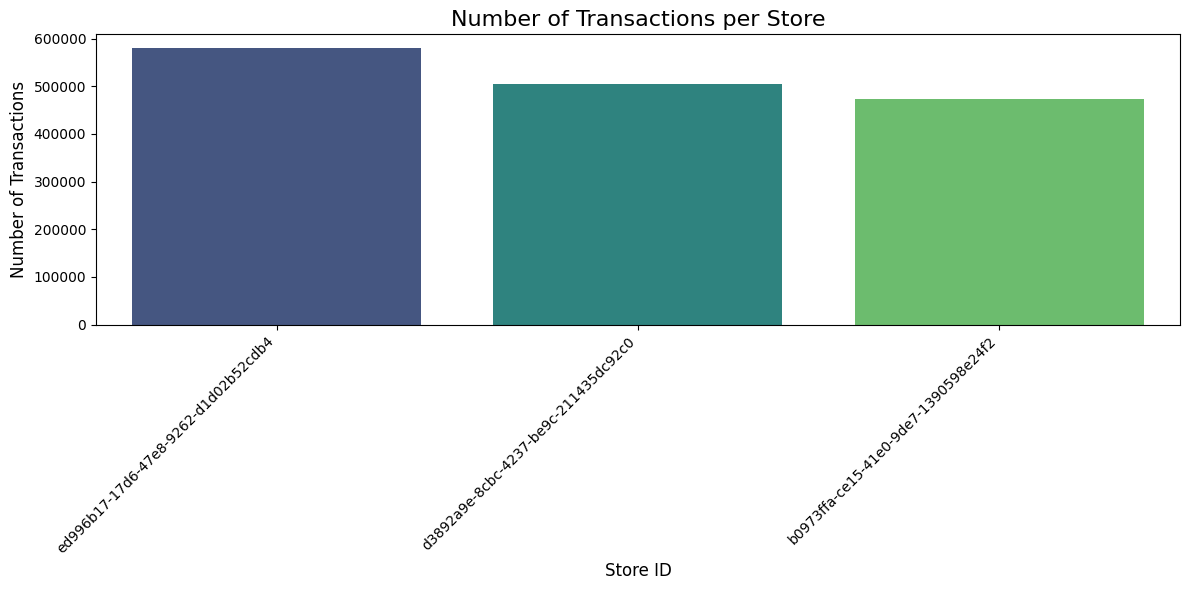

Transaction Counts per Store:
store_id
ed996b17-17d6-47e8-9262-d1d02b52cdb4    580073
d3892a9e-8cbc-4237-be9c-211435dc92c0    505512
b0973ffa-ce15-41e0-9de7-1390598e24f2    472660
Name: count, dtype: int64


In [109]:
# 1. Calculate the number of transactions per store
store_counts = transactions_train_source['store_id'].value_counts()

# 2. Create the plot
plt.figure(figsize=(12, 6)) # Adjust figure size as needed

# Using seaborn's barplot
# store_counts.index contains the store_id's
# store_counts.values contains the counts
sns.barplot(x=store_counts.index, y=store_counts.values, palette='viridis', order=store_counts.index) # Use order to maintain value_counts order

# --- Alternatively, use seaborn's countplot directly ---
# sns.countplot(data=transactions_train_source, x='store_id',
#               order=transactions_train_source['store_id'].value_counts().index, # Order by frequency
#               palette='viridis')

# 3. Add labels and title for clarity
plt.title('Number of Transactions per Store', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap

# 4. Improve layout and display the plot
plt.tight_layout() # Adjusts plot to prevent labels overlapping
plt.show()

# Optional: Print the counts as well
print("Transaction Counts per Store:")
print(store_counts)

In [110]:
## 

In [111]:
null_product_id_count = transaction_lines_train_source['product_id'].isnull().sum()

print(f"Number of transaction lines with null product_id: {null_product_id_count}")

if null_product_id_count > 0:
    print("\nSample rows with null product_id:")
    # Display rows where product_id is null
    print(transaction_lines_train_source[transaction_lines_train_source['product_id'].isnull()].head())

Number of transaction lines with null product_id: 199

Sample rows with null product_id:
        id                        transaction_id product_id  \
5418     2  23a8f8b0-5ee8-466f-8932-027af7443c8d       None   
12529   13  6e5754e8-0360-4c6c-87a5-b525adcd0028       None   
17969    6  f141f6ca-29fc-4bd7-b46d-9e58b27b23a0       None   
39566    2  1102c5d6-58bf-4ef6-be37-c1b531d1b838       None   
154720   1  29a29984-07b3-4138-8bfe-a73099869466       None   

                        timestamp  pieces_or_weight  sales_price  was_voided  \
5418   2022-02-11 18:52:21.513651               0.0          0.0        True   
12529  2022-02-26 08:39:35.775132               0.0          0.0        True   
17969  2022-02-28 20:45:01.696620               0.0          0.0        True   
39566  2022-03-19 21:05:58.330412               0.0          0.0        True   
154720 2022-09-10 09:47:15.545587               0.0          0.0        True   

       camera_product_similar  camera_certainty  
5

In [112]:
# Get unique non-null product IDs from the transaction lines table
transaction_product_ids_no_nulls = set(transaction_lines_train_source['product_id'].dropna().unique())

# Get unique product IDs from the products table
product_master_ids = set(products_source['id'].unique()) # Assuming no None/NaN here

# Check subset ignoring nulls from transactions
is_subset_products_no_nulls = transaction_product_ids_no_nulls.issubset(product_master_ids)

print("-" * 30) # Separator
print("Checking consistency IGNORING null product_ids from transaction lines:")

if is_subset_products_no_nulls:
    print("✅ All non-null product_id values from 'transaction_lines_train_source' are present in 'products_source'.")
    if transaction_lines_train_source['product_id'].isnull().any():
         num_nulls = transaction_lines_train_source['product_id'].isnull().sum()
         print(f"   (Note: {num_nulls} transaction lines had null product IDs, which were ignored in this check.)")
else:
    missing_product_ids_no_nulls = transaction_product_ids_no_nulls - product_master_ids
    print(f"❌ Not all non-null product_id values from 'transaction_lines_train_source' are present in 'products_source'.")
    print(f"   Missing non-null product IDs: {missing_product_ids_no_nulls}")
    if transaction_lines_train_source['product_id'].isnull().any():
         num_nulls = transaction_lines_train_source['product_id'].isnull().sum()
         print(f"   (Note: {num_nulls} transaction lines also had null product IDs.)")

------------------------------
Checking consistency IGNORING null product_ids from transaction lines:
✅ All non-null product_id values from 'transaction_lines_train_source' are present in 'products_source'.
   (Note: 199 transaction lines had null product IDs, which were ignored in this check.)


## Visualize Product Distribution (Transaction Line Count per Product)

Simply the top 20 and their number of transaciton lines. It turns out that this graphic is not very interesting. We need something more informative.

Plotting the top 20 most frequent products (out of 3237 unique products found).


C:\Users\lol--\AppData\Local\Temp\ipykernel_7092\2639063237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts_to_plot.index, y=product_counts_to_plot.values, palette='magma', order=product_counts_to_plot.index)


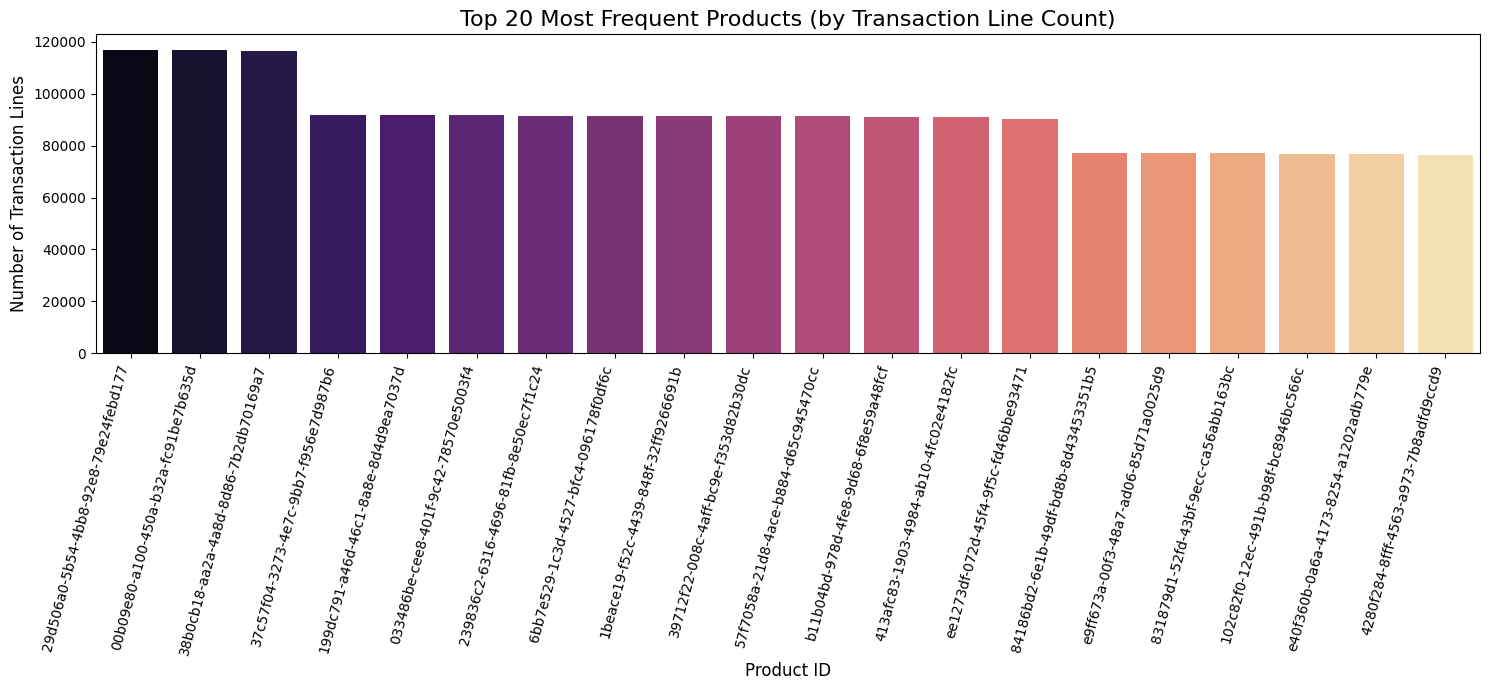

In [113]:
# 1. Calculate the number of transaction lines per product
product_counts = transaction_lines_train_source['product_id'].value_counts()

# 2. Select Top N products to visualize (optional, but recommended for many products)
# Plotting potentially thousands of products is not feasible or informative.
top_n = 20 # You can change this number
if len(product_counts) > top_n:
    print(f"Plotting the top {top_n} most frequent products (out of {len(product_counts)} unique products found).")
    product_counts_to_plot = product_counts.head(top_n)
    plot_title = f'Top {top_n} Most Frequent Products (by Transaction Line Count)'
else:
    print(f"Plotting all {len(product_counts)} unique products found.")
    product_counts_to_plot = product_counts
    plot_title = 'Product Frequency (by Transaction Line Count)'


# 3. Create the plot
plt.figure(figsize=(15, 7)) # Adjust figure size as needed

# Using seaborn's barplot
sns.barplot(x=product_counts_to_plot.index, y=product_counts_to_plot.values, palette='magma', order=product_counts_to_plot.index)

# 4. Add labels and title for clarity
plt.title(plot_title, fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Transaction Lines', fontsize=12)
plt.xticks(rotation=75, ha='right') # Rotate labels more if product IDs are long

# 5. Improve layout and display the plot
plt.tight_layout()
plt.show()

# # Optional: Print the full counts or top N counts
# print(f"\nTransaction Line Counts per Product (Top {top_n if len(product_counts) > top_n else len(product_counts)}):")
# print(product_counts_to_plot)

Wir erstellen mal einen Plot für das aufkommen aller produkte und schauen uns an wie die verteilung aussieht.

In [5]:
# Calculate counts, excluding potential None values
product_counts = transaction_lines_train_source['product_id'].dropna().value_counts()

In [6]:
# 1. Convert the product_counts Series to a DataFrame.
#    The Series index (product identifiers) becomes the first column,
#    and Series values (counts) become the second column.
counts_df = product_counts.reset_index()

# 2. Standardize column names in the newly created counts_df.
#    - Rename the first column (which came from the Series index, e.g., 'product_identifier_original_name') to 'id'.
#    - Rename the second column (which came from the Series values and is named after product_counts.name, e.g., 'original_counts_name')
#      to 'series_actual_count' for clarity in subsequent steps.
id_col_from_index_name = counts_df.columns[0]         # This is the original name of the index column
values_col_from_series_name = counts_df.columns[1]    # This is product_counts.name

counts_df = counts_df.rename(columns={
    id_col_from_index_name: 'id',                 # Standardizing to 'id'
    values_col_from_series_name: 'series_actual_count'
})
# Now, counts_df has an 'id' column (containing product identifiers)
# and a 'series_actual_count' column (containing the original counts).

# Part 2: Incorporate "extra IDs" from products_source and finalize counts

# 3. Create a DataFrame containing all unique product IDs from products_source.
#    This ensures all IDs from products_source are considered for the final list.
#    The column is named 'id' to match the 'id' column in counts_df for merging.
all_source_ids_df = pd.DataFrame({'id': products_source['id'].unique()})

# 4. Perform an outer merge between the prepared counts_df (from Part 1)
#    and all_source_ids_df (from step 3) using the common 'id' column.
#    - 'outer' merge ensures all IDs from both DataFrames are included in merged_df.
#    - IDs that were in the original product_counts (now in counts_df) will carry over
#      their 'series_actual_count'.
#    - IDs that are only in products_source (the "extra IDs") will have NaN
#      for 'series_actual_count' at this stage because they weren't in the initial counts_df.
merged_df = pd.merge(
    counts_df,           # Contains 'id' and 'series_actual_count'
    all_source_ids_df,   # Contains 'id' (all unique IDs from products_source)
    on='id',             # Merging on the standardized 'id' column
    how='outer'
)

# 5. Fill NaN values in the 'series_actual_count' column with 0.
#    These NaNs correspond to the "extra IDs" from products_source that were not
#    in the original product_counts. They are now assigned a count of 0.
merged_df['series_actual_count'] = merged_df['series_actual_count'].fillna(0)

# 6. Ensure the count column is of integer type.
#    The fillna(0) operation might have changed the dtype to float if there were NaNs,
#    so explicitly converting to int is a good practice.
merged_df['series_actual_count'] = merged_df['series_actual_count'].astype(int)

# 7. Rename the 'series_actual_count' column to 'occurrence_count' for the final DataFrame.
#    (This step is optional; you can keep 'series_actual_count' if that name is preferred).
product_counts_total = merged_df.rename(columns={'series_actual_count': 'occurrence_count'})

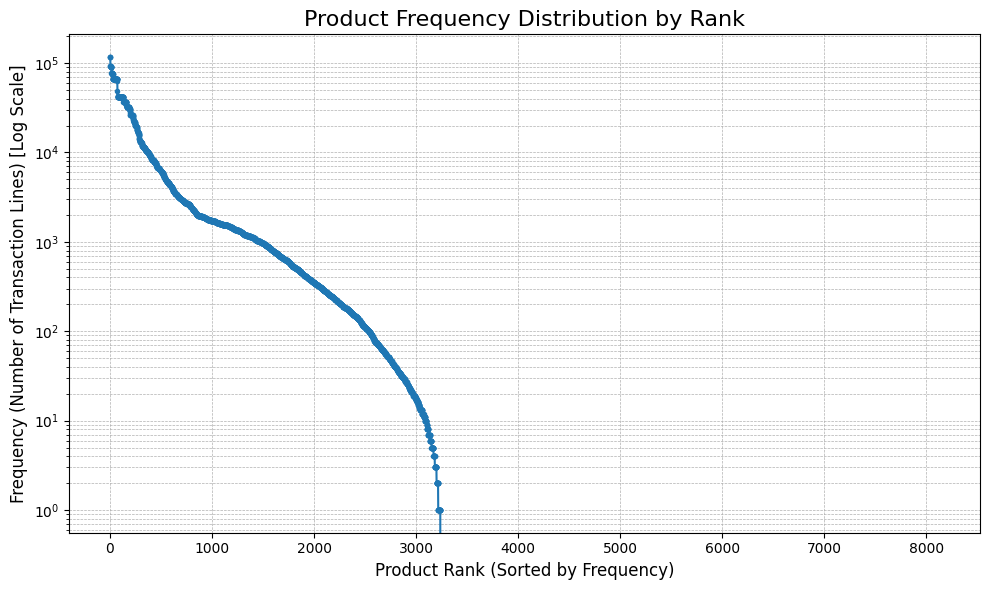


Plot generated for 8120 unique non-null products.
Highest frequency: 116952
Lowest frequency: 0


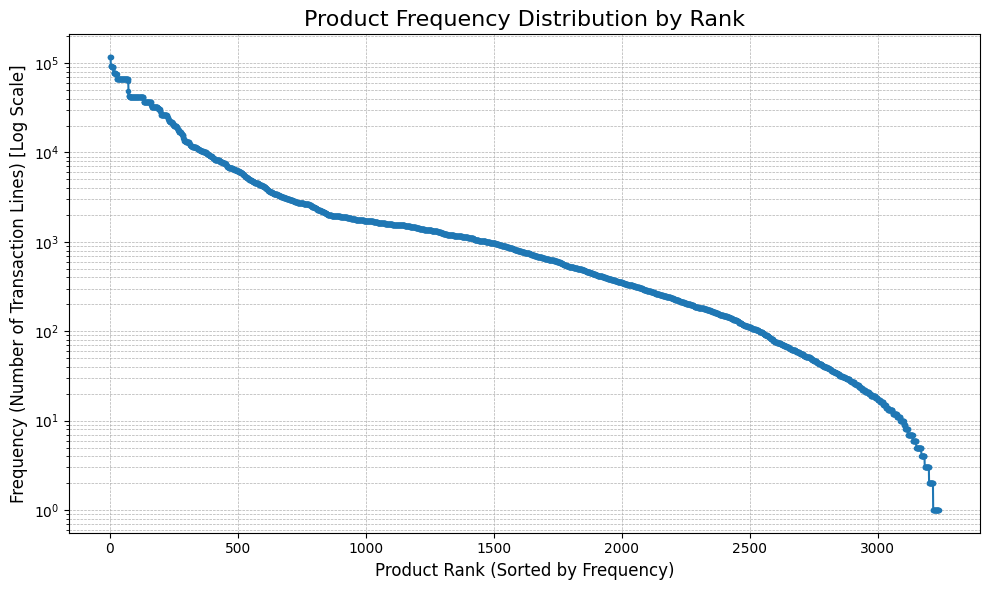


Plot generated for 3237 unique non-null products.
Highest frequency: 116952
Lowest frequency: 1


In [9]:

# Get frequencies (the counts themselves)
frequencies1 = np.sort(product_counts_total.occurrence_count.values)[::-1]
frequencies2 = product_counts.values
# frequencies = product_counts.values

for frequencies in [frequencies1, frequencies2]:
    # 1. Get ranks (1st most frequent, 2nd most frequent, ...)
    ranks = np.arange(1, len(frequencies) + 1)

    # 2. Create the plot
    plt.figure(figsize=(10, 6))

    plt.plot(ranks, frequencies, marker='.', linestyle='-') # Use line plot

    # 3. Use logarithmic scale for the frequency axis (highly recommended)
    plt.yscale('log')
    # Optional: Use log scale for rank axis too (log-log plot)
    # plt.xscale('log')

    # 4. Add labels and title
    plt.title('Product Frequency Distribution by Rank', fontsize=16)
    plt.xlabel('Product Rank (Sorted by Frequency)', fontsize=12)
    plt.ylabel('Frequency (Number of Transaction Lines) [Log Scale]', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Add grid for readability

    # 5. Display the plot
    plt.tight_layout()
    plt.show()

    print(f"\nPlot generated for {len(frequencies)} unique non-null products.")
    print(f"Highest frequency: {frequencies[0]}")
    print(f"Lowest frequency: {frequencies[-1]}")

In [10]:
len(frequencies1) - len(frequencies2)

4883

Die Plots haben auf jeden fall schonmal eine schöne form. Ich glaube die arbeit noch die produkte mit keinem vorkommen mit zu plotten hat sich nicht gelohnt. Alles was man extra sieht ist, dass etwas mehr als die Hälfte der gelisteten Produkte nicht vorkommt. Dafür kann man den plot aber viel schlechter sehen. Für den Vortrag bin ich mir auch garnicht mehr so sicher ob das zu technisch ist.

Aber zur Erklärung von was man sieht. Es gibt eben 8120 Produkte, davon kommen 4883 in keiner Transaktion vor. Und die frequenz mit der die Produkte vorkommen variiert in einer schönen s vorm von 116952 zu einem einmaligen vorkommen.

Es wäre hier noch interessant sich einige Beispiele anzuschauen.

## Ein trainingsset erstellen

Enriching Transactions with Store Info.

In [115]:
# Merge transactions with stores. Keep all transactions (left join).
# Suffix '_store' is added to columns from stores_source if they conflict
transactions_enriched = pd.merge(
    transactions_train_source,
    stores_source,
    left_on='store_id',
    right_on='id', # 'id' column from stores_source
    how='left',
    suffixes=('', '_store') # Add suffix to store columns if needed
)
# Drop the redundant 'id' column from the stores table after merge
transactions_enriched = transactions_enriched.drop(columns=['id_store'], errors='ignore') # Use errors='ignore' in case suffix wasn't needed
print("Transactions enriched with store info:")
print(transactions_enriched.info())

Transactions enriched with store info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558245 entries, 0 to 1558244
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1558245 non-null  object        
 1   store_id           1558245 non-null  object        
 2   cash_desk          1558245 non-null  int64         
 3   transaction_start  1558245 non-null  datetime64[us]
 4   transaction_end    1558245 non-null  datetime64[us]
 5   total_amount       1558245 non-null  float64       
 6   n_lines            1558245 non-null  int64         
 7   payment_medium     1558245 non-null  object        
 8   customer_feedback  108330 non-null   float64       
 9   damage             155692 non-null   float64       
 10  label              1558245 non-null  object        
 11  opening_date       1558245 non-null  object        
 12  location           1558245 non-null  object  

Enriching Transaction Lines with Product Info.

In [116]:
# Merge transaction lines with products. Keep all lines (left join).
# Suffix '_product' is added to columns from products_source if they conflict
lines_enriched = pd.merge(
    transaction_lines_train_source,
    products_source,
    left_on='product_id',
    right_on='id', # 'id' column from products_source
    how='left',
    suffixes=('', '_product') # Add suffix to product columns if needed
)
# Drop the redundant 'id' column from the products table after merge
lines_enriched = lines_enriched.drop(columns=['id_product'], errors='ignore') # Use errors='ignore'
print("Transaction lines enriched with product info:")
print(lines_enriched.info())

Transaction lines enriched with product info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620157 entries, 0 to 16620156
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   transaction_id          object        
 2   product_id              object        
 3   timestamp               datetime64[us]
 4   pieces_or_weight        float64       
 5   sales_price             float64       
 6   was_voided              bool          
 7   camera_product_similar  object        
 8   camera_certainty        float64       
 9   base_product_id         object        
 10  category                object        
 11  price                   float64       
 12  popularity              float64       
 13  valid_from              object        
 14  valid_to                object        
 15  sold_by_weight          object        
 16  weight                  float64       
 17

Aggregating Enriched Lines per Transaction.

In [117]:
# Group the enriched lines by transaction_id
# For each group, convert the rows (which are lines for that transaction)
# into a list of dictionaries.
# Using apply with lambda is a common way to do this.
# Using .to_dict('records') converts the DataFrame group into List[Dict]
aggregated_lines = lines_enriched.groupby('transaction_id').apply(
    lambda x: x.to_dict('records'),
    # include_groups=False # For newer pandas versions to avoid warning/error
).reset_index(name='transaction_lines_details')

print("Aggregated lines structure (first few):")
print(aggregated_lines.head())

C:\Users\lol--\AppData\Local\Temp\ipykernel_7092\817612267.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_lines = lines_enriched.groupby('transaction_id').apply(


Aggregated lines structure (first few):
                         transaction_id  \
0  00001236-d285-440a-9ba9-0770f76ad13e   
1  00001f16-0b24-4ea2-8a66-d3b7eb5956e1   
2  0000226f-5c36-4a2b-a956-6ca0b89716e2   
3  00002e0b-2568-4090-905b-2faeee38c071   
4  00004374-bf31-4137-80c5-4ab40748ba79   

                           transaction_lines_details  
0  [{'id': 1, 'transaction_id': '00001236-d285-44...  
1  [{'id': 1, 'transaction_id': '00001f16-0b24-4e...  
2  [{'id': 1, 'transaction_id': '0000226f-5c36-4a...  
3  [{'id': 1, 'transaction_id': '00002e0b-2568-40...  
4  [{'id': 1, 'transaction_id': '00004374-bf31-41...  


Wenn wir die Information der Tabellen als gemeinsammes sehen wollen gibt es zwei mögliche Arten die Tabellen in einer zusammen zu fassen. Entweder auf der Ebene der Artikel (transaction lines) oder auf der Ebene der Einkäufe (transactions). Ich habe mich hier dafür entschieden auf der ebene der Transaktionen zu mergen, weil die folgende Tabelle als der Anfang für das feature engineering gedacht ist. Die vorhersagen werden wir auf ebene der Transactionen machen und damit wollen wir die daten auch auf dieser Ebene vorbereiten.

Final Merge - Adding Aggregated Lines to Transactions.

In [118]:
# Merge the aggregated lines back onto the enriched transactions table
# Key for transactions_enriched is 'id' (transaction ID)
# Key for aggregated_lines is 'transaction_id'
final_df = pd.merge(
    transactions_enriched,
    aggregated_lines,
    left_on='id',           # Transaction ID from the main transactions table
    right_on='transaction_id', # Transaction ID from the aggregated lines
    how='left'              # Keep all transactions, add lines where they exist
)

# Drop the now redundant 'transaction_id' column that came from aggregated_lines
final_df = final_df.drop(columns=['transaction_id'])

final_df

,id,store_id,cash_desk,transaction_start,transaction_end,total_amount,n_lines,payment_medium,customer_feedback,damage,label,opening_date,location,state,urbanization,sco_introduction,transaction_lines_details
0,5bedf771-f016-41a7-ab89-f40e7f6be955,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:00:12.000000,2022-02-02 08:01:02.825563,52.26,6,CREDIT_CARD,NaN,NaN,UNKNOWN,2005-06-02,Berlin,Berlin,RURAL,2022-02-02,"[{'id': 1, 'transaction_id': '5bedf771-f016-41..."
1,21ff1406-dbc4-41a7-8429-836cbf96d853,b0973ffa-ce15-41e0-9de7-1390598e24f2,1,2022-02-02 08:05:06.000000,2022-02-02 08:05:30.565876,1.47,1,CREDIT_CARD,NaN,NaN,UNKNOWN,2005-06-02,Berlin,Berlin,RURAL,2022-02-02,"[{'id': 1, 'transaction_id': '21ff1406-dbc4-41..."
2,b642f9b6-43b5-413d-ad08-b4bf4b664b52,b0973ffa-ce15-41e0-9de7-1390598e24f2,2,2022-02-02 08:07:12.000000,2022-02-02 08:11:29.434607,363.87,37,CREDIT_CARD,NaN,0.0,NORMAL,2005-06-02,Berlin,Berlin,RURAL,2022-02-02,"[{'id': 1, 'transaction_id': 'b642f9b6-43b5-41..."
3,16aa01c9-9678-4c6d-a007-baa3429b9fb8,b0973ffa-ce15-41e0-9de7-1390598e24f2,3,2022-02-02 08:11:45.000000,2022-02-02 08:12:07.881710,3.43,1,CREDIT_CARD,NaN,NaN,UNKNOWN,2005-06-02,Berlin,Berlin,RURAL,2022-02-02,"[{'id': 1, 'transaction_id': '16aa01c9-9678-4c..."
4,0add22e5-6794-4e95-9d25-a1cd6b6cd083,b0973ffa-ce15-41e0-9de7-1390598e24f2,0,2022-02-02 08:15:15.000000,2022-02-02 08:19:30.611551,441.40,47,CREDIT_CARD,NaN,NaN,UNKNOWN,2005-06-02,Berlin,Berlin,RURAL,2022-02-02,"[{'id': 1, 'transaction_id': '0add22e5-6794-4e..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558240,703518b6-435c-4665-84a9-35b914d27f12,ed996b17-17d6-47e8-9262-d1d02b52cdb4,1,2023-12-30 21:57:13.359949,2023-12-30 21:58:17.045461,117.47,6,CREDIT_CARD,10.0,NaN,UNKNOWN,1994-09-19,München,Bayern,TOWNS,2022-02-06,"[{'id': 1, 'transaction_id': '703518b6-435c-46..."
1558241,1aae20ce-f7a4-4dd0-a1f7-ab580cc81c7d,ed996b17-17d6-47e8-9262-d1d02b52cdb4,0,2023-12-30 21:57:24.000000,2023-12-30 21:58:44.201062,76.79,6,CREDIT_CARD,NaN,NaN,UNKNOWN,1994-09-19,München,Bayern,TOWNS,2022-02-06,"[{'id': 1, 'transaction_id': '1aae20ce-f7a4-4d..."
1558242,dc62b127-ccd0-455d-8dc8-99fe63a9e6cb,ed996b17-17d6-47e8-9262-d1d02b52cdb4,3,2023-12-30 21:57:45.000000,2023-12-30 22:00:28.962767,237.00,23,CREDIT_CARD,NaN,NaN,UNKNOWN,1994-09-19,München,Bayern,TOWNS,2022-02-06,"[{'id': 1, 'transaction_id': 'dc62b127-ccd0-45..."
1558243,e3004e7e-452a-407d-9a84-84d3b797a422,ed996b17-17d6-47e8-9262-d1d02b52cdb4,2,2023-12-30 21:58:06.000000,2023-12-30 22:00:08.294801,126.99,19,CREDIT_CARD,NaN,NaN,UNKNOWN,1994-09-19,München,Bayern,TOWNS,2022-02-06,"[{'id': 1, 'transaction_id': 'e3004e7e-452a-40..."


In [119]:
# Access the list of dicts for the first row (index 0)
if not final_df.empty and 'transaction_lines_details' in final_df.columns and isinstance(final_df.loc[0, 'transaction_lines_details'], list):
     print(final_df.loc[0, 'transaction_lines_details'])
else:
     print("First transaction might not have lines or data is empty/NaN.")

[{'id': 1, 'transaction_id': '5bedf771-f016-41a7-ab89-f40e7f6be955', 'product_id': '0b118c17-0f80-43df-a2e6-559b3b2e97e1', 'timestamp': Timestamp('2022-02-02 08:00:23.196121'), 'pieces_or_weight': 2.0, 'sales_price': 4.38, 'was_voided': False, 'camera_product_similar': True, 'camera_certainty': 0.2597183401223839, 'base_product_id': '0396911a-2506-4b03-879b-39e218021968', 'category': 'FRUITS_VEGETABLES_PIECES', 'price': 2.19, 'popularity': 0.1290651565714589, 'valid_from': '2017-07-16', 'valid_to': '2023-11-01', 'sold_by_weight': False, 'weight': 3.912555406780165, 'age_restricted': False}, {'id': 2, 'transaction_id': '5bedf771-f016-41a7-ab89-f40e7f6be955', 'product_id': '61c851d6-3d28-438e-aa4f-2d3247546f40', 'timestamp': Timestamp('2022-02-02 08:00:35.032006'), 'pieces_or_weight': 1.0, 'sales_price': 0.49, 'was_voided': False, 'camera_product_similar': False, 'camera_certainty': 0.2699197908410968, 'base_product_id': '61c851d6-3d28-438e-aa4f-2d3247546f40', 'category': 'FRUITS_VEGETAB

## Fragen

1. Es gibt 200 einträge ohne produkt id. Wieso? Aber eigentlich sind das genug, dass man sie ignorieren kann.
2. Mehr als sieben Prozent aller transaktionen fehlt mindestens ein zugehöriger artikel in der transaction line tabelle. Das sind schon so viele, dass man mal nachfragen sollte wieso sie fehlen und ob es einen Datensatz gibt wo sie dabei sind.

# Aufgaben

 - Product Frequency Plot (gemacht)
 - Ein wenig mehr kommentieren (Große Teile sind jetzt kommentiert)
 - Distribution of damaged transactions per hour percentage (gemacht)
 - Anzahl der Transaktionen, bei denen 'n_lines' NICHT mit der tatsächlichen Zeilenanzahl übereinstimmt überprüfen (gemacht)
 - Mögliche gute Tabellen bei der Statistischen bewertung

Bereinigung

 - null values
 - spalten löschen
 - daten typen convertieren
 - daten groupen
 - ausreißer prüfen
 - dupletten prüfen